In [1]:
import os
import scipy.io.wavfile as wf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
####
#

#normalize a single array
def qnorm(inp):
    M = np.amax(np.absolute(inp))
    return inp*((2**15-1)/M)

def norm(inp):
    M = np.amax(np.absolute(inp))
    return inp/M

def iSNR_control(signal,noise,SNR):
    
    #now A
    A_now = 0
    for i in noise :
        A_now = A_now + i*i
    A_now = np.sqrt(A_now/len(noise))
    
    #aim A
    A_sig = 0
    for i in signal :
        A_sig = A_sig + i*i
    A_sig = np.sqrt(A_sig/len(signal))
    
    A_aim = A_sig/(10**(SNR/20))
    
    k = A_aim/A_now
#     print(k)
    noise = k*noise
    return noise

def get_n_sample(signal,noiseR,noiseL):
    
    Ls = len(signal)
    Ln = len(noiseR)
    
    Ln = Ln-Ls
    p = random.randrange(0,Ln)
    
    return noiseR[p:p+Ls],noiseL[p:p+Ls]

#
####

In [3]:
NOISE_NAMES={0:'DLIVING',
             1:'DWASHING',
             2:'NFIELD',
             3:'NPARK',
             4:'NRIVER',
             5:'OHALLWAY',
             6:'OMEETING',
             7:'OOFFICE',
             8:'PCAFETER',
             9:'PRESTO',
             10:'PSTATION',
             11:'SPSQUARE',
             12:'STRAFFIC',
             13:'TBUS',
             14:'TCAR',
             15:'TMETRO'}


SNR_train_list = [15,10,5,0]
SNR_test_list = [17.5,12.5,7.5,2.5]
print(NOISE_NAMES[4])

NRIVER


824
824


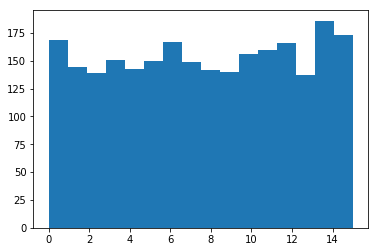

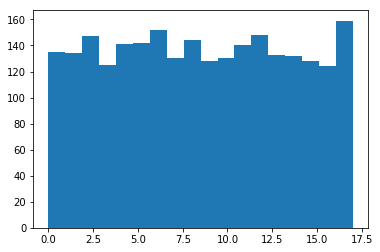

In [4]:
LD = os.listdir('./clean_testset_wav_16k')
print(len(LD))
    
I = []
II=[]
III=[]
t = True
while t:
    n1 = random.randrange(0,16)
    n2 = random.randrange(0,16)
    n3 = random.randrange(0,16)

    d1 = random.randrange(0,6)
    d2 = random.randrange(6,12)
    d3 = random.randrange(12,18)
      
    k = [n1,n2,n3,d1,d2,d3]

    I.append(k)
    II.append(n1)
    II.append(n2)
    II.append(n3)
    
    III.append(d1)
    III.append(d2)
    III.append(d3)
    if len(I) == len(LD):
        t = False
print(len(I))

plt.hist(II,16)
plt.show()
plt.hist(III,18)
plt.show()

In [5]:
indx = 0
print(LD[0])
for f_name in LD:
    print(f_name)
    SR,clean_wav = wf.read('./clean_testset_wav_16k/%s'%(f_name))
#     print('clean_wav : ',type(clean_wav[0]))
    
    nn1,nn2,nn3,nd1,nd2,nd3 = I[indx]

    if nd1 >= 9:
        nd1 = nd1+1
    if nd2 >= 9:
        nd2 = nd2+1
    if nd3 >= 9:
        nd3 = nd3+1
    
    SR,noise1R = wf.read('./DEMAND_16k_3_16bit/%s_%dd_R.wav'%(NOISE_NAMES[nn1],nd1))
    if SR != 16000:
        print(f_name)
    SR,noise1L = wf.read('./DEMAND_16k_3_16bit/%s_%dd_L.wav'%(NOISE_NAMES[nn1],nd1))
    if SR != 16000:
        print(f_name)
        
    SR,noise2R = wf.read('./DEMAND_16k_3_16bit/%s_%dd_R.wav'%(NOISE_NAMES[nn2],nd2))
    if SR != 16000:
        print(f_name)
    SR,noise2L = wf.read('./DEMAND_16k_3_16bit/%s_%dd_L.wav'%(NOISE_NAMES[nn2],nd2))
    if SR != 16000:
        print(f_name)
        
    SR,noise3R = wf.read('./DEMAND_16k_3_16bit/%s_%dd_R.wav'%(NOISE_NAMES[nn3],nd3))
    if SR != 16000:
        print(f_name)
    SR,noise3L = wf.read('./DEMAND_16k_3_16bit/%s_%dd_L.wav'%(NOISE_NAMES[nn3],nd3))
    if SR != 16000:
        print(f_name)
        
    indx = indx+1
    

    n1R_sample,n1L_sample = get_n_sample(clean_wav,noise1R,noise1L)
    
    n2R_sample,n2L_sample = get_n_sample(clean_wav,noise3R,noise2L)
    
    n3R_sample,n3L_sample = get_n_sample(clean_wav,noise3R,noise3L)
    
#     print(len(clean_wav))
#     print('n1R_sample : ',type(n1R_sample[0]))
#     print(len(n1L_sample))
    
    noiseR = n1R_sample+n2R_sample+n3R_sample
    noiseL = n1L_sample+n2L_sample+n3L_sample
    
    noiseR = iSNR_control(signal=clean_wav,noise=noiseR,SNR=SNR_test_list[indx%4])
    noiseL = iSNR_control(signal=clean_wav,noise=noiseL,SNR=SNR_test_list[indx%4])
    
#     noisy_wav = norm(np.array([clean_wav+noiseR,clean_wav+noiseL]))#.astype(np.float16)
    noisy_wav1 = norm(np.array(clean_wav+noiseR))
    noisy_wav2 = norm(np.array(clean_wav+noiseL))
    clean_wav = norm(clean_wav)#.astype(np.float16)
#     noisy_wav = noisy_wav.astype(np.int16)
    if len(noisy_wav1) != len(noisy_wav2):
        raise ValueError
    if len(noisy_wav1) != len(clean_wav):
        raise ValueError

        
    wf.write('./DSEnet_test_DATA_1cm_3/MICR/%s'%f_name,SR,noisy_wav1)
    wf.write('./DSEnet_test_DATA_1cm_3/MICL/%s'%f_name,SR,noisy_wav2)
    wf.write('./DSEnet_test_DATA_1cm_3/LookD/%s'%f_name,SR,clean_wav)
    
#     print('noisy_wav[0] : ',type(noisy_wav1[0]))
    
#     wav=[]
#     for ii in range(len(noisy_wav[0])):
#         wav.append([noisy_wav[0][ii],noisy_wav[1][ii]])
#     wf.write('./DSEnet_test_DATA_1cm_2/stereo/%s'%f_name,SR,np.array(wav))
    print(indx,'/',len(LD))
    
    

p232_001.wav
p232_001.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_002.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_003.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_005.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_006.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_007.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_009.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_010.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_011.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_012.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_013.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_014.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_015.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_016.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_017.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_019.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_020.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_021.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_022.wav
noisy_wav[0] :  <cla

noisy_wav[0] :  <class 'numpy.float64'>
p232_165.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_167.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_169.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_170.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_171.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_172.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_173.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_174.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_175.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_176.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_177.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_178.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_179.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_180.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_181.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_182.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_183.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_184.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_1

noisy_wav[0] :  <class 'numpy.float64'>
p232_328.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_329.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_330.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_331.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_332.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_333.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_334.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_335.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_336.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_337.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_338.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_339.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_340.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_341.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_342.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_343.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_344.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_346.wav
noisy_wav[0] :  <class 'numpy.float64'>
p232_3

noisy_wav[0] :  <class 'numpy.float64'>
p257_076.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_077.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_078.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_079.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_080.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_081.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_082.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_083.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_084.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_085.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_086.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_087.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_088.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_089.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_090.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_091.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_092.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_093.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_0

noisy_wav[0] :  <class 'numpy.float64'>
p257_232.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_233.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_234.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_235.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_236.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_237.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_238.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_239.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_240.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_241.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_242.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_243.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_244.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_245.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_246.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_247.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_248.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_249.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_2

noisy_wav[0] :  <class 'numpy.float64'>
p257_387.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_388.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_389.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_390.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_391.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_392.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_393.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_394.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_395.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_396.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_397.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_398.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_399.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_400.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_401.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_402.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_403.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_404.wav
noisy_wav[0] :  <class 'numpy.float64'>
p257_4

11572
11572


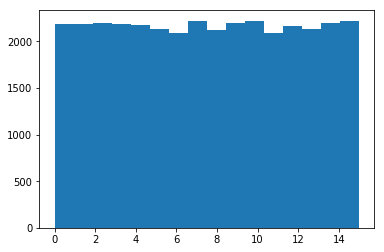

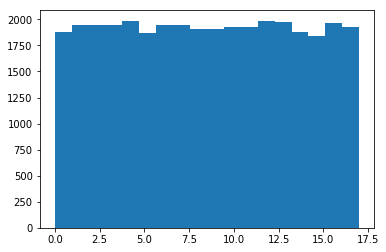

In [6]:
LD = os.listdir('./clean_trainset_wav_16k')
print(len(LD))
    
I = []
II=[]
III=[]
t = True
while t:
    n1 = random.randrange(0,16)
    n2 = random.randrange(0,16)
    n3 = random.randrange(0,16)

    d1 = random.randrange(0,6)
    d2 = random.randrange(6,12)
    d3 = random.randrange(12,18)
      
    k = [n1,n2,n3,d1,d2,d3]

    I.append(k)
    II.append(n1)
    II.append(n2)
    II.append(n3)
    
    III.append(d1)
    III.append(d2)
    III.append(d3)
    if len(I) == len(LD):
        t = False
print(len(I))

plt.hist(II,16)
plt.show()
plt.hist(III,18)
plt.show()

In [7]:
indx = 0
print(LD[0])
for f_name in LD:
#     print(f_name)
    SR,clean_wav = wf.read('./clean_trainset_wav_16k/%s'%(f_name))
    
#     print(clean_wav)
    
    nn1,nn2,nn3,nd1,nd2,nd3 = I[indx]

    if nd1 >= 9:
        nd1 = nd1+1
    if nd2 >= 9:
        nd2 = nd2+1
    if nd3 >= 9:
        nd3 = nd3+1
    
    SR,noise1R = wf.read('./DEMAND_16k_3_16bit/%s_%dd_R.wav'%(NOISE_NAMES[nn1],nd1))
    if SR != 16000:
        print(f_name)
    SR,noise1L = wf.read('./DEMAND_16k_3_16bit/%s_%dd_L.wav'%(NOISE_NAMES[nn1],nd1))
    if SR != 16000:
        print(f_name)
        
    SR,noise2R = wf.read('./DEMAND_16k_3_16bit/%s_%dd_R.wav'%(NOISE_NAMES[nn2],nd2))
    if SR != 16000:
        print(f_name)
    SR,noise2L = wf.read('./DEMAND_16k_3_16bit/%s_%dd_L.wav'%(NOISE_NAMES[nn2],nd2))
    if SR != 16000:
        print(f_name)
        
    SR,noise3R = wf.read('./DEMAND_16k_3_16bit/%s_%dd_R.wav'%(NOISE_NAMES[nn3],nd3))
    if SR != 16000:
        print(f_name)
    SR,noise3L = wf.read('./DEMAND_16k_3_16bit/%s_%dd_L.wav'%(NOISE_NAMES[nn3],nd3))
    if SR != 16000:
        print(f_name)
        
    indx = indx+1
    

    n1R_sample,n1L_sample = get_n_sample(clean_wav,noise1R,noise1L)
    
    n2R_sample,n2L_sample = get_n_sample(clean_wav,noise3R,noise2L)
    
    n3R_sample,n3L_sample = get_n_sample(clean_wav,noise3R,noise3L)
    
#     print(len(clean_wav))
#     print(n1R_sample)
#     print(len(n1L_sample))
    
    noiseR = n1R_sample+n2R_sample+n3R_sample
    noiseL = n1L_sample+n2L_sample+n3L_sample
    
    noiseR = iSNR_control(signal=clean_wav,noise=noiseR,SNR=SNR_train_list[indx%4])
    noiseL = iSNR_control(signal=clean_wav,noise=noiseL,SNR=SNR_train_list[indx%4])
    
#     noisy_wav = norm(np.array([clean_wav+noiseR,clean_wav+noiseL]))#.astype(np.float16)
    noisy_wav1 = norm(np.array(clean_wav+noiseR))#.astype(np.float16)
    noisy_wav2 = norm(np.array(clean_wav+noiseL))#.astype(np.float16)
    clean_wav = norm(clean_wav)#.astype(np.float16)
    if len(noisy_wav1) != len(noisy_wav2):
        raise ValueError
    if len(noisy_wav1) != len(clean_wav):
        raise ValueError

        
    wf.write('./DSEnet_train_DATA_1cm_3/MICR/%s'%f_name,SR,noisy_wav1)
    wf.write('./DSEnet_train_DATA_1cm_3/MICL/%s'%f_name,SR,noisy_wav2)
    wf.write('./DSEnet_train_DATA_1cm_3/LookD/%s'%f_name,SR,clean_wav)
    
#     wav=[]
#     for ii in range(len(noisy_wav[0])):
#         wav.append([noisy_wav[0][ii],noisy_wav[1][ii]])
#     wf.write('./DSEnet_train_DATA_1cm_2/stereo/%s'%f_name,SR,np.array(wav))
    
    print(indx,'/',len(LD))
    

p226_001.wav
